## Comparison of Solvers+Preconditioners##

In [1]:
from dolfin import*
%matplotlib inline
import time
from sympy import sin
import pylab

parameters['linear_algebra_backend'] = 'PETSc'
parameters["krylov_solver"]["relative_tolerance"] = 1.0e-8
parameters["krylov_solver"]["absolute_tolerance"] = 1.0e-8
parameters["krylov_solver"]["monitor_convergence"] = False
parameters["krylov_solver"]["report"] = False
parameters["krylov_solver"]["maximum_iterations"] = 50000


In [2]:
def solving_time(A,b,solver):
    U = Function(V)
    t0 =time.time()
    if len(solver) == 2:
        solve(A, U.vector(), b, solver[0], solver[1])
    else:
        solve(A, U.vector(), b, solver[0])
    t1 = time.time()
    return t1 - t0
    

In [3]:
Ns = []; unknowns = []

lu_time = []
cg_time = []
cgicc_time = []
cgamg_time = []

for N in [32, 64, 128, 256, 512]:
    Ns.append(N)
    
    mesh = UnitSquareMesh(N,N)
    print(" N " , N, "dofs", mesh.num_vertices())
    unknowns.append(mesh.num_vertices())
    V = FunctionSpace(mesh, "Lagrange", 1)
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Expression('(sin(x[0]*12) - x[1])', degree=1)
    a = u*v*dx + inner(grad(u), grad(v))*dx
    L = f*v*dx
    
    A = assemble(a)
    b = assemble(L)
    t2 = solving_time(A,b,["lu"])
    print("Time for lu" , t2)
    lu_time.append(t2)
    
    t2 = solving_time(A,b,["cg"])
    print("Time for cg" , t2)
    cg_time.append(t2)
    
    t2 = solving_time(A,b,["cg", "icc"])
    print("Time for cg/icc" , t2)
    cgicc_time.append(t2)
    
    t2 = solving_time(A,b,["cg", "amg"])
    print("Time for cg/amg" , t2)
    cgamg_time.append(t2)
    
    


 N  32 dofs 1089
Time for lu 0.011623859405517578
Time for cg 0.00244903564453125
Time for cg/icc 0.0042035579681396484
Time for cg/amg 0.008387088775634766
 N  64 dofs 4225
Time for lu 0.06703066825866699
Time for cg 0.024209976196289062
Time for cg/icc 0.018815040588378906
Time for cg/amg 0.02914142608642578
 N  128 dofs 16641
Time for lu 0.1695857048034668
Time for cg 0.1058194637298584
Time for cg/icc 0.0862569808959961
Time for cg/amg 0.07547616958618164
 N  256 dofs 66049
Time for lu 1.4039306640625
Time for cg 1.1059412956237793
Time for cg/icc 1.1280343532562256
Time for cg/amg 0.41383910179138184
 N  512 dofs 263169
Time for lu 9.681572675704956
Time for cg 7.924692869186401
Time for cg/icc 6.434614658355713
Time for cg/amg 1.2611582279205322


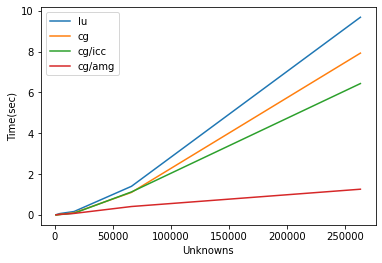

In [4]:
pylab.plot(unknowns, lu_time)
pylab.plot(unknowns, cg_time)
pylab.plot(unknowns, cgicc_time)
pylab.plot(unknowns, cgamg_time)
pylab.xlabel('Unknowns')
pylab.ylabel('Time(sec)')
pylab.legend(["lu", "cg", "cg/icc", "cg/amg"])
pylab.savefig('time_cpu.pdf')
pylab.show()
